In [16]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [17]:
def pairwise(iterable):
    "s -> (s0, s1), (s2, s3), (s4, s5), ..."
    a = iter(iterable)
    return zip(a, a)

def fft_time(N, xn):
    N_2 = int(N / 2)
    k = int(len(xn)/N)
    X = np.zeros([N_2, k])
    for i in range(k):
        X[:,i] = (np.abs(np.fft.fft(xn[N*i:N*(i+1)])))[0:N_2] / N
    return X

tf = np.vectorize(lambda x, t: x if x > t else 0)

Text(0.5, 0, 'czas, próbki')

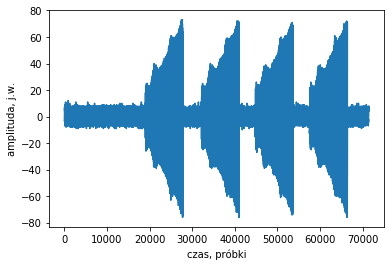

In [22]:
file="chirp_0_5.txt"
with open(file) as f:
    data = f.read()
x = []
for a,b in pairwise(data):
    s = a + b
    x.append(int(s, 16))

x = np.int8(x)

Fs = 10000
Ts = 1 / Fs

plt.plot(x)
plt.ylabel("amplituda, j.w.")
plt.xlabel("czas, próbki")

Text(0.5, 0, 'czas, próbki')

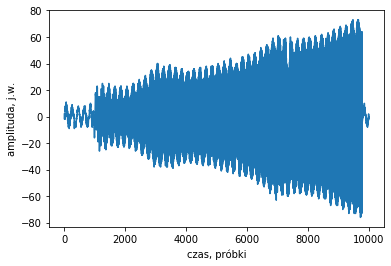

In [26]:
xn = x[18000:28000]
plt.plot(xn)
plt.ylabel("amplituda, j.w.")
plt.xlabel("czas, próbki")

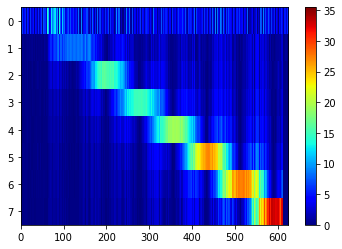

In [29]:
X_16 = fft_time(16, xn)
plt.imshow(X_16, aspect='auto', cmap=matplotlib.cm.jet)
plt.colorbar()

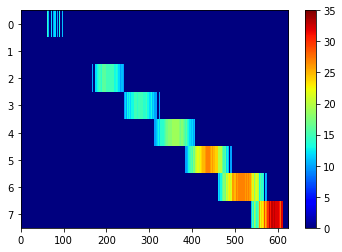

In [32]:
X_16_t = tf(X_16, 10)
plt.imshow(X_16_t, aspect='auto', cmap=matplotlib.cm.jet)
plt.colorbar()